In [19]:
%matplotlib inline 
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
from ggplot import *
import numpy as np

In [2]:
df = pd.read_csv('user_ids.csv', nrows=500000, index_col=False)

In [3]:
df.shape

(500000, 8)

In [4]:
df1 = df.drop_duplicates()

In [5]:
df1.shape

(148787, 8)

In [149]:
df['year'] = [datetime.strptime(x, '%a %b %d %H:%M:%S %z %Y').year for x in df.created_at.tolist()]
df['month'] = [datetime.strptime(x, '%a %b %d %H:%M:%S %z %Y').month for x in df.created_at.tolist()]

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f20de6ee208>]], dtype=object)

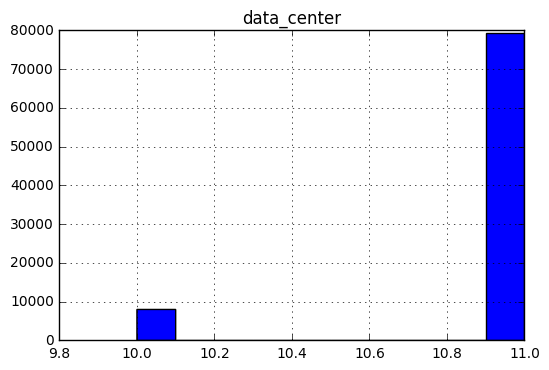

In [106]:
df.hist(column='data_center')

In [109]:
df.data_center.describe()

count    87326.000000
mean        10.908401
std          0.288461
min         10.000000
25%         11.000000
50%         11.000000
75%         11.000000
max         11.000000
Name: data_center, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f20bdbef518>]], dtype=object)

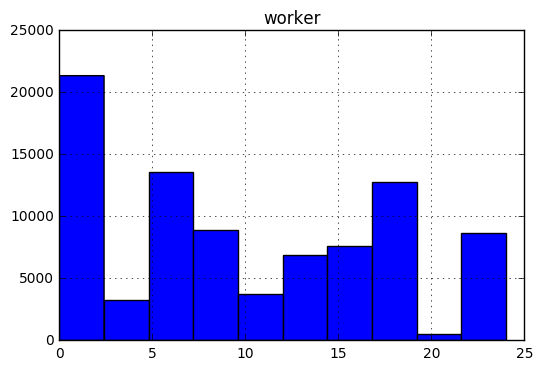

In [108]:
df.hist(column='worker')

In [118]:
sorted(df.worker.unique())

[8.0,
 nan,
 0.0,
 1.0,
 2.0,
 3.0,
 4.0,
 5.0,
 6.0,
 7.0,
 9.0,
 10.0,
 11.0,
 12.0,
 13.0,
 14.0,
 15.0,
 16.0,
 17.0,
 18.0,
 19.0,
 21.0,
 22.0,
 24.0]

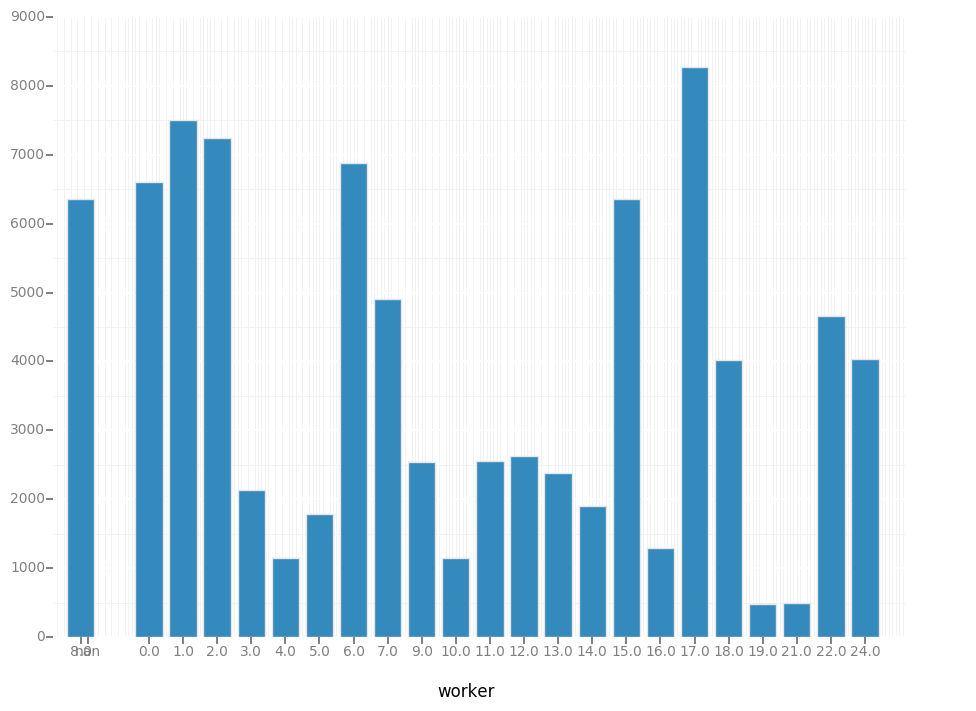

<ggplot: (8736159828039)>

In [126]:
ggplot(aes(x = 'worker'), data=df) + geom_bar() + theme_bw()

In [120]:
sorted(df.sequence.unique())

[0.0,
 nan,
 1.0,
 2.0,
 3.0,
 4.0,
 5.0,
 6.0,
 7.0,
 8.0,
 9.0,
 10.0,
 11.0,
 12.0,
 14.0,
 15.0,
 16.0,
 23.0,
 25.0,
 29.0,
 37.0]

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f20bcd6d048>]], dtype=object)

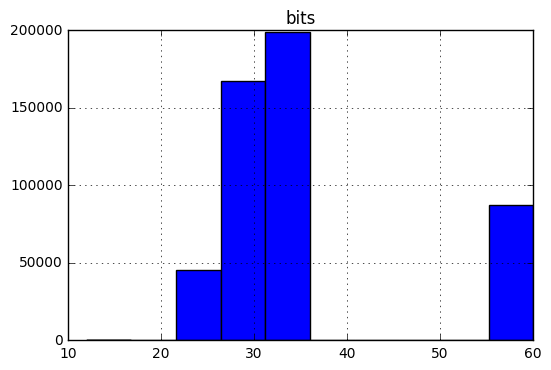

In [115]:
df.hist(column='bits')

In [117]:
sorted(df.bits.unique())

[12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 60]

In [154]:
df_old = df[df.bits < 50]

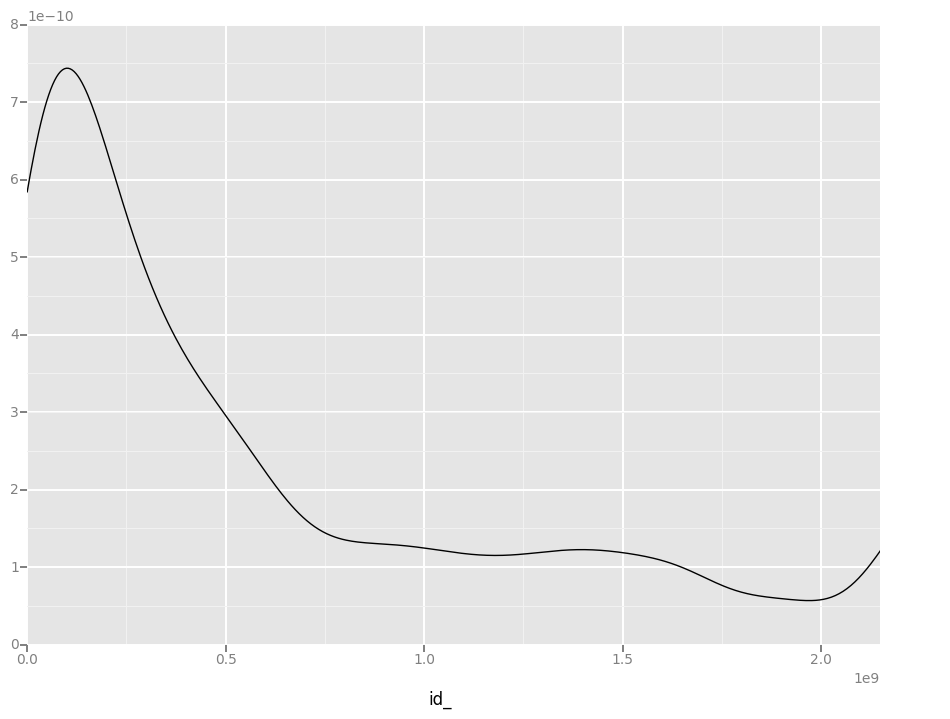

<ggplot: (-9223363300675886490)>

In [142]:
ggplot(aes(x='id_'), data=df_old) + geom_density() + xlim(0, (2**31-1))

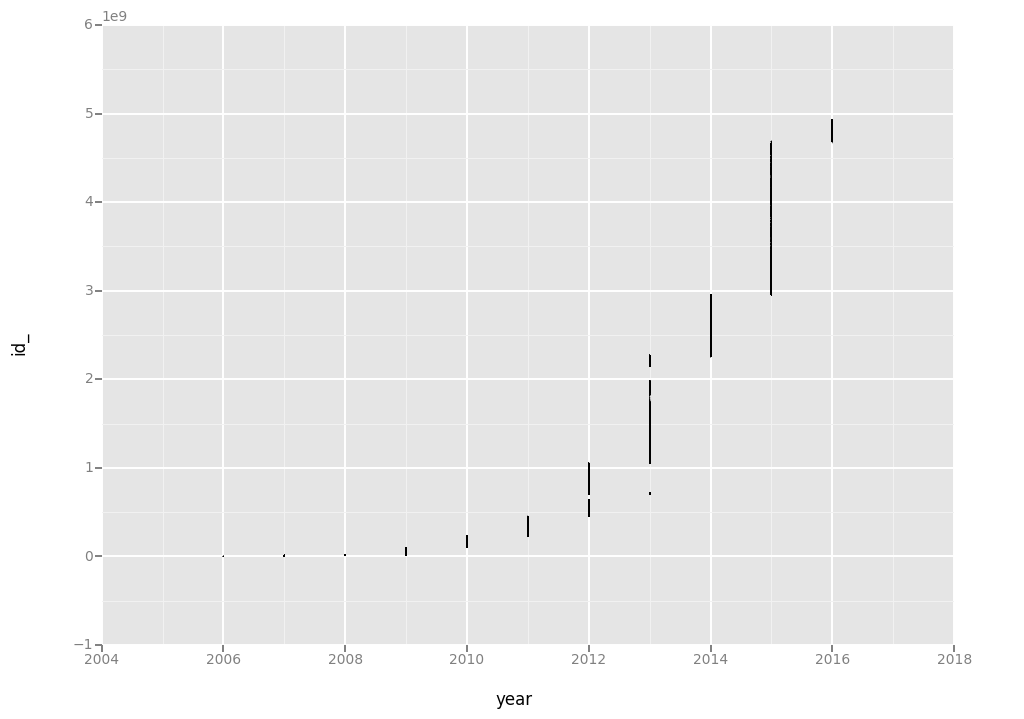

<ggplot: (-9223363300693737542)>

In [134]:
ggplot(aes(x='year', y='id_'), data = df_old) + geom_point(size=0.5, alpha=0.5)

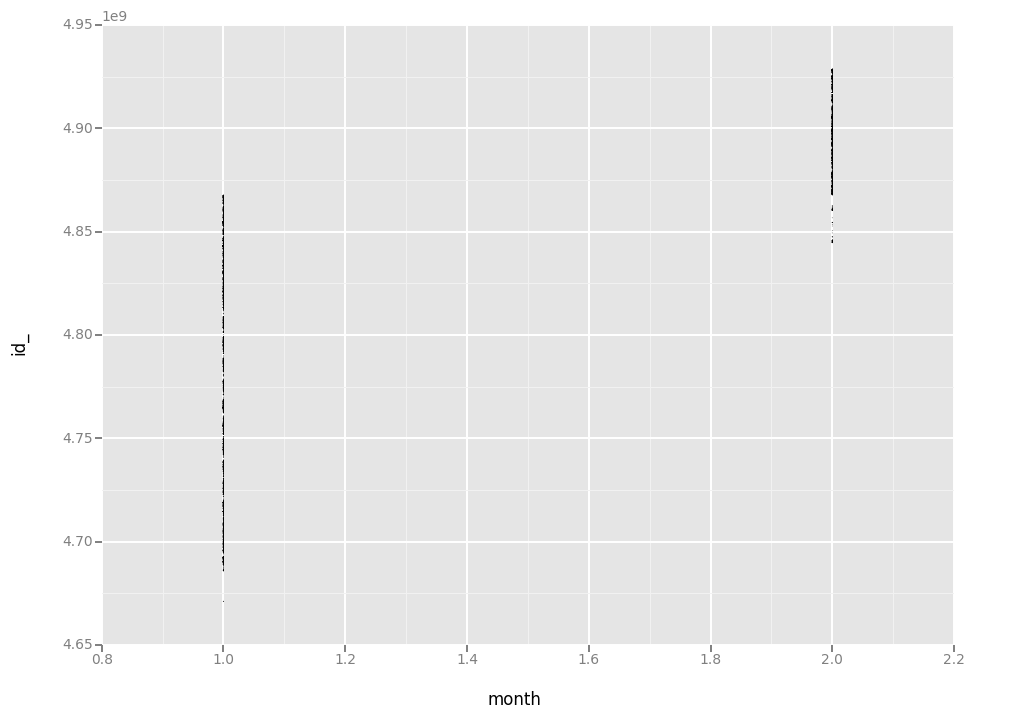

<ggplot: (-9223363300676126888)>

In [158]:
ggplot(aes(x='month', y='id_'), data=df_old[df_old.year == 2016]) +\
    geom_point(size=0.5, alpha = 0.5)

In [151]:
df_new = df[df.bits > 50]

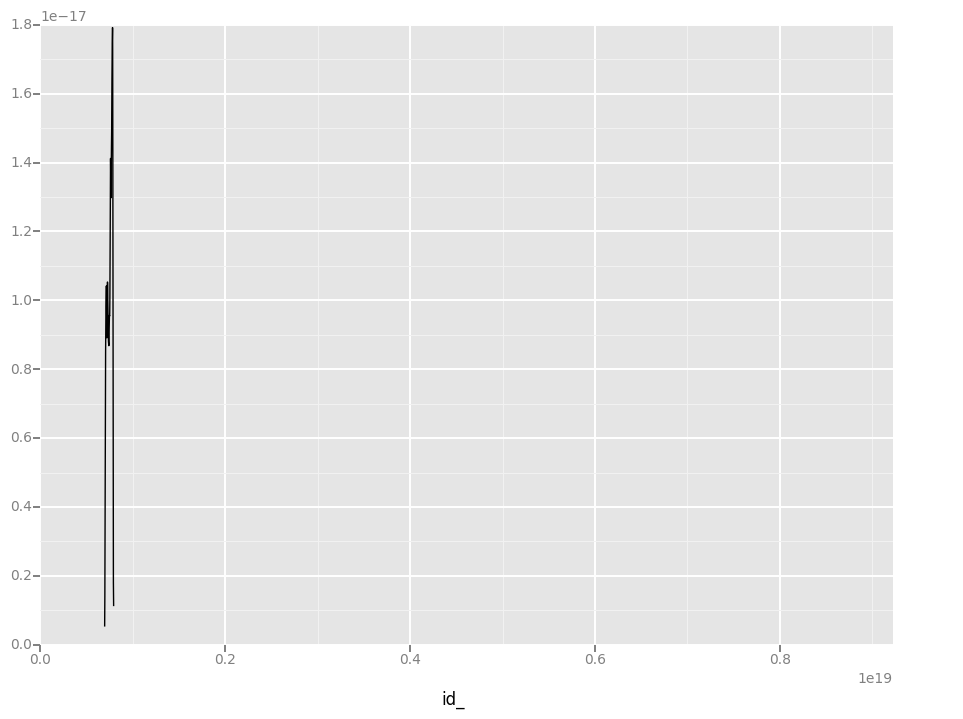

<ggplot: (-9223363300675898010)>

In [141]:
ggplot(aes(x='id_'), data=df_new) + geom_density() + xlim(0, (2**63-1))

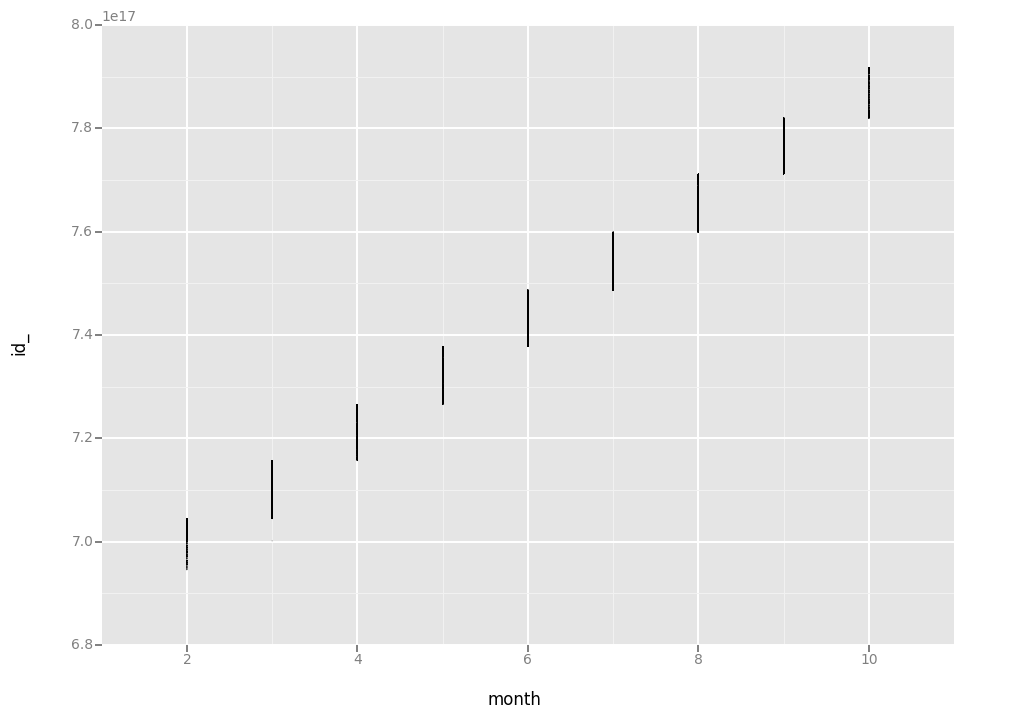

<ggplot: (8736177909873)>

In [152]:
df_new = df_new[df_new.year > 2010]
ggplot(aes(x='month', y='id_'), data = df_new) + geom_point(size=0.5, alpha=0.5)